<a href="https://colab.research.google.com/github/peeyushsinghal/EVA/blob/main/S9-Assignment/EVA_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**cloning the models git hub **

In [1]:
!pip install -U albumentations

     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 47.6 MB 125 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!git clone https://github.com/peeyushsinghal/common-pytorch-models.git

Cloning into 'common-pytorch-models'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 104 (delta 43), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 34.38 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [3]:
import os
os.getcwd() 
os.chdir('common-pytorch-models')

#### Setting Device and Seed

In [4]:
# loading helper functions
from utils.helper import seed_all, get_device, get_mean_std_dev

In [5]:
# check for default device

device = get_device()
print (f' device Status : {device}')
device

 device Status : cuda


device(type='cuda')

In [6]:
## setting seed for reproducibility
SEED = 42 # arbit seed, why 42 - because in hitch hikers guide to galaxy it is answer to everything
seed_all(SEED)

### Loading data

In [7]:
# Getting Mean and Standard Deviation of CIFAR 10 dataset
mean, std_dev = get_mean_std_dev("CIFAR10")
print(f"Mean : {mean}   STD: {std_dev}") #Mean : [0.491 0.482 0.446]   STD: [0.247 0.243 0.261]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Mean : (0.4913996786152028, 0.4821584083946074, 0.4465309144454644)   STD: (0.24703223246328238, 0.2434851280000556, 0.26158784172796423)


### Applying Transformations

In [8]:
from utils.transforms import apply_transforms_custom_resnet # custom transformations for custom resnet

train_transforms, test_transforms = apply_transforms_custom_resnet(mean,std_dev)

### Train and Test data

In [9]:
from torchvision import datasets

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 **Labels**

In [10]:
labels = trainset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

 **Train and Test set Dataloader**

In [11]:
import torch
batch_size = 512 # as required 

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#### Visualizing Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

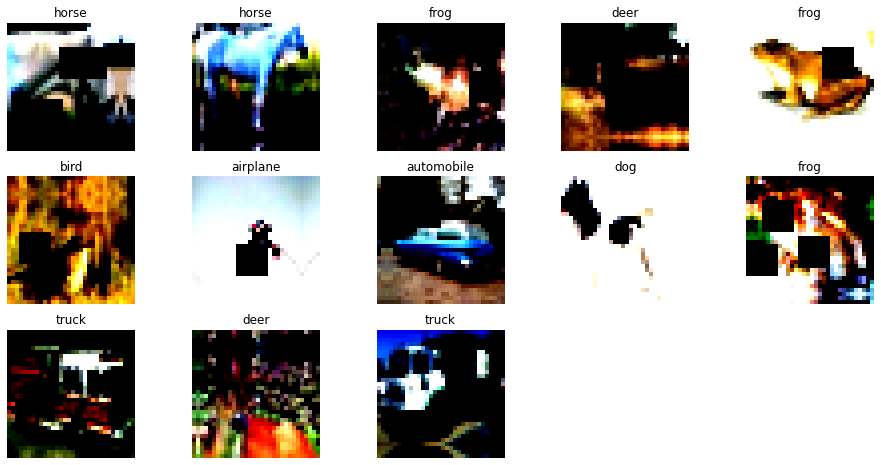

In [12]:
from utils.plot_utils import show_batch
show_batch(trainloader,labels,num_images=13) # for visualizing images

### 2. Network
Loading Model, understanding model params by checking summary

In [13]:
from models.custom_resnet import custom_resnet # Model
from utils.helper import model_summary # shows summary 

model = custom_resnet("BN").to(device) # creating model
model_summary(model, (3, 32, 32)) # shows model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

### 3. Training and Testing

*   includes test and train functions
*   includes loop function, where test can happen after each epoch is trained

In [14]:
import torch.optim as optim # for optimizer
import torch.nn as nn # for network, criterion
import torch.nn.functional as F 


criterion = nn.CrossEntropyLoss()

# epochs = 24
epochs = 1
max_epoch = 5
lr = 0.001


optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=lr)

# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',\
#                                                  factor=0.1, patience=10, threshold=0.0001, threshold_mode='abs')

### 3.1 One Cycle Rate Finder

  0%|          | 0/98 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


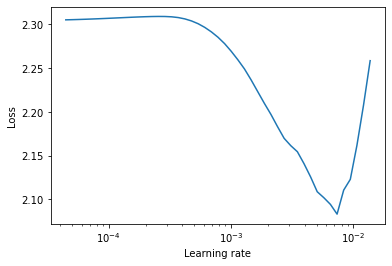

In [17]:
from utils.lrfinder import LRFinder
lr_finder = LRFinder(model,optimizer,criterion,device=device)
lr_finder.range_test(trainloader, testloader, start_lr=1e-5, end_lr=2, num_iter=len(trainloader), step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [23]:
best_loss = lr_finder.best_loss
LRMAX  = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]
LRMIN = LRMAX / 10
print("Best Loss: %s\n Max Learning Rate: %s \n Min Learning Rate: %s" % (best_loss,LRMAX,LRMIN))

Best Loss: 2.0832062729678444
 Max Learning Rate: 0.00736009752647928 
 Min Learning Rate: 0.000736009752647928


In [19]:
# from utils.lrfinder import find_lr # Learning rate finder

# LRMAX  = find_lr(model, trainloader, testloader, max_epoch, optimizer, criterion, device)
# LRMIN = LRMAX / 10

# print (f'Maximum Learning Rate: {LRMAX} , Minimum Learning Rate : {LRMIN}')

In [20]:
# from torch_lr_finder import LRFinder
# lr_finder = LRFinder(model, optimizer, criterion, device=device)
# lr_finder.range_test(trainloader, val_loader=testloader, end_lr=1, num_iter=len(trainloader), step_mode="linear",diverge_th=50)
# lr_finder.reset()


# lr_finder.reset()


In [21]:
# LRMAX  = lr_finder.plot(suggest_lr=True, skip_start=0, skip_end=0)


In [28]:
# lr_finder.reset()

In [16]:
from main import trainer, train, test # including wrapper function of train and test
# train_accuracy, train_losses, test_accuracy, test_losses = trainer(model,device, trainloader, testloader, optimizer,epochs,criterion,scheduler)


EPOCH: 1


Loss=1.1551860570907593 Batch_id=97 Accuracy=48.36: 100%|██████████| 98/98 [01:54<00:00,  1.17s/it]



Test set: Average loss: 0.0001, Accuracy: 5976/10000 (59.76%)



### 4. Checking results
visualizing train_accuracy, train_losses, test_accuracy, test_losses

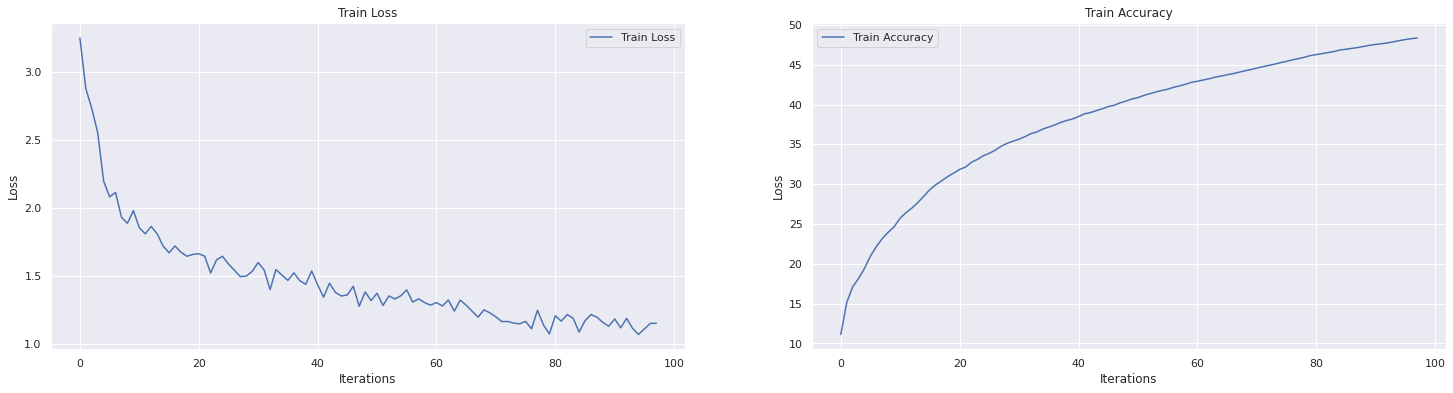

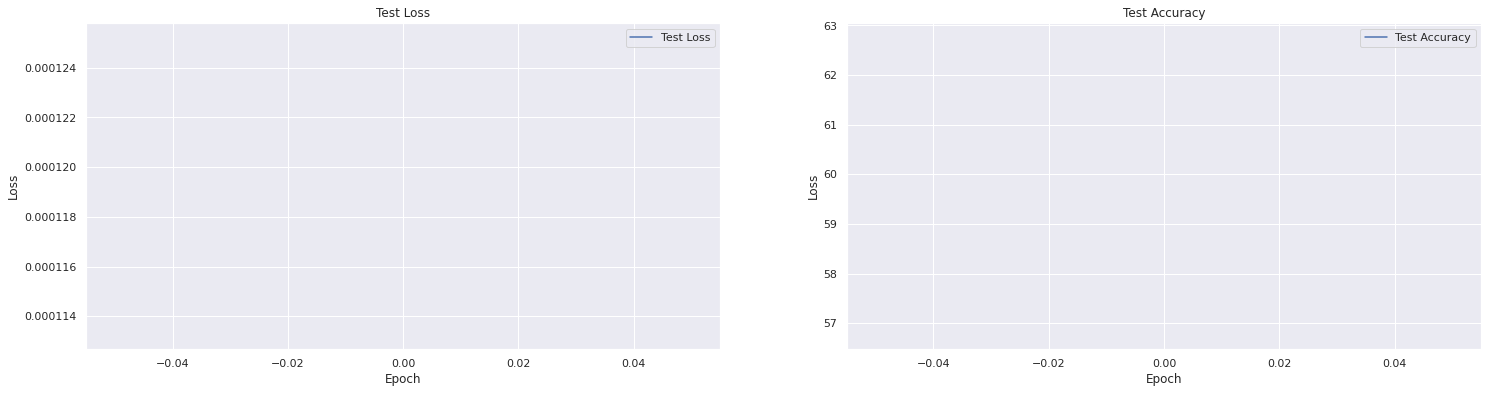

In [17]:
from utils.plot_utils import plot_metrics

plot_metrics(train_accuracy, train_losses, test_accuracy, test_losses)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

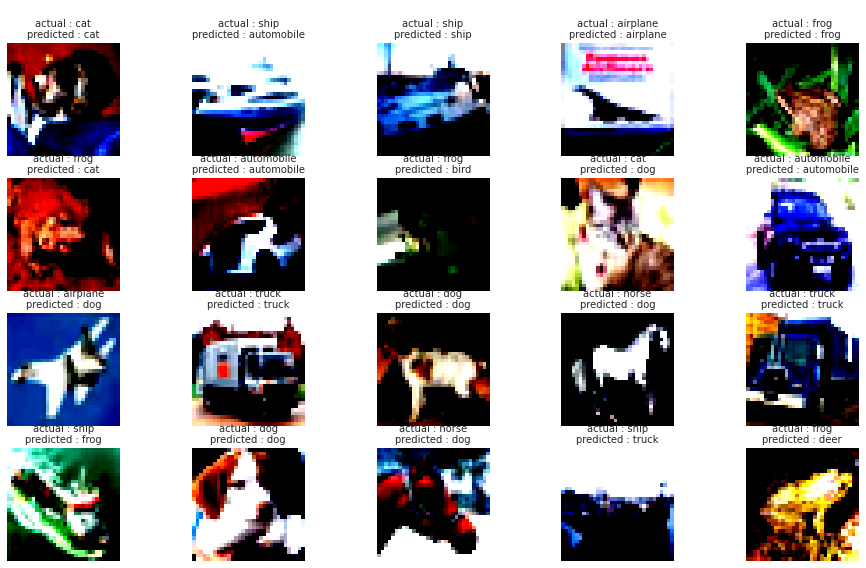

In [18]:
# import matplotlib.pyplot as plt

# def show_predicted_actual(model, device, dataset_loader, label_names,num_images=10):
# 	'''
# 	shows a batch of predicted and actual images (default=10 )
# 	'''
# 	images, targets = next(iter(dataset_loader))
# 	images = images.to(device)
# 	outputs = model(images)
# 	_, predicted = torch.max(outputs, 1)

# 	plt.figure(figsize=(16, 12))
# 	for i in range(num_images):
# 		ax = plt.subplot(int(num_images//5)+1, 5, i + 1)
# 		ax.imshow(images[i].cpu().permute(1, 2, 0))
# 		ax.set_title(f"\nactual : {label_names[targets[i]]}\npredicted : {label_names[predicted[i]]}", fontsize=10)

# 		# plt.title("actual:"+label_names[targets[i]])
# 		plt.axis("off")

from utils.plot_utils import show_predicted_actual

show_predicted_actual(model, device, testloader, labels,num_images=20)

### Misclassified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 4024


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


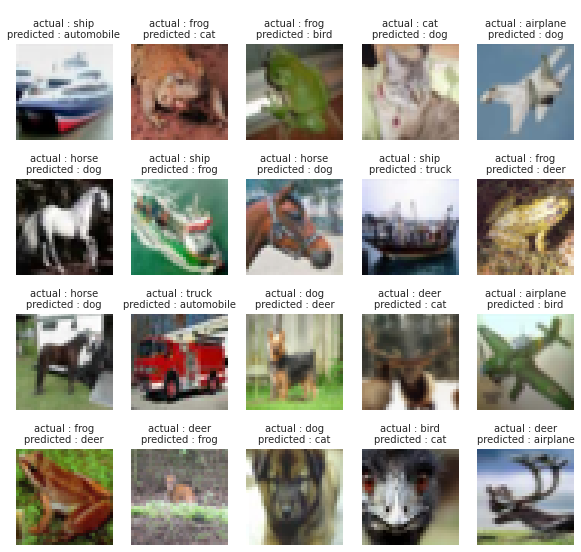

In [19]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, testloader, device, mean, std_dev)

In [20]:
# def evaluate_classwise_accuracy(model, device, classes, test_loader):
#     class_correct = list(0. for i in range(10))
#     class_total = list(0. for i in range(10))
#     with torch.no_grad():
#         for images, labels in test_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             c = (predicted == labels).squeeze()
#             for i in range(4):
#             	label = labels[i]
#             	class_correct[label] += c[i].item()
#             	class_total[label] += 1

#     for i in range(10):
#         print('Accuracy of %5s : %2d %%' % (
#             classes[i], 100 * class_correct[i] / class_total[i]))
      
# evaluate_classwise_accuracy(model, device, labels, testloader)


*Class Level Accuarcy*

In [21]:
## Checking class level accuracy
from utils.helper import evaluate_classwise_accuracy
evaluate_classwise_accuracy(model, device, labels, testloader)


Accuracy of airplane : 57 %
Accuracy of automobile : 100 %
Accuracy of  bird : 71 %
Accuracy of   cat : 33 %
Accuracy of  deer : 28 %
Accuracy of   dog : 50 %
Accuracy of  frog : 36 %
Accuracy of horse : 16 %
Accuracy of  ship : 66 %
Accuracy of truck : 50 %


### Grad Cam output for 20 misclassified images

first top 10 images are shown
then next 10 images are shown

In [22]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])

Generating Grad-CAM for layer1


ValueError: ignored

In [ ]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[10:20], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[10:20])